# Data Cleaning
Aqui vamos realizar toda a etapa de limpeza dos dados para nossa analise de dados



# Importando bibliotecas


In [1]:
# bibliotecas
import numpy as np
import pandas as pd
import datetime

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import altair as alt


In [2]:
# importar os conjuntos de dados

# game: Reúne os registros de cada jogo no conjunto de dados
game = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game.csv")

# game_golie_stats: As estatísticas dos goleiros que participaram dos jogos
game_golie_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_goalie_stats.csv")

# game_plays: As jogadas individuais de cada jogo
#game_plays = pd.read_csv("https://dl.dropbox.com/s/r34sk4632lphbcz/game_plays.csv?dl=0")
    
# game_plays_player: Os jogadores envolvidos em uma jogada
#game_plays_player = pd.read_csv("https://dl.dropbox.com/s/9bafo0bjc1fs7wm/game_plays_players.csv?dl=0")
    
# game_shifts: Detalhes a respeito dos turnos dos jogadores
#game_shifts = pd.read_csv("https://dl.dropbox.com/s/j8s06eo3osisrr0/game_shifts.csv?dl=0")

# game_skater_stats: As estatísticas básicas dos jogadores. 36 entradas por jogo, uma para cada jogador do time
#game_skater_stats = pd.read_csv("https://dl.dropbox.com/s/apvje2rso032qjm/game_skater_stats.csv?dl=0")

# game_teams_stats: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe
game_teams_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_teams_stats.csv")

# player_info: Informações sobre os jogadores
player_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/player_info.csv")

# team_info: informação sobre as equipes
team_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/team_info.csv")

In [3]:
game.head(3)

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT


In [4]:
team_info.head(3)

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26


In [5]:
game_teams_stats.head(3)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7


In [6]:
player_info.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412
1,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501
2,8459670,Kimmo,Timonen,FIN,Kuopio,D,1975-03-18,/api/v1/people/8459670
3,8471233,Travis,Zajac,CAN,Winnipeg,C,1985-05-13,/api/v1/people/8471233
4,8455710,Martin,Brodeur,CAN,Montreal,G,1972-05-06,/api/v1/people/8455710


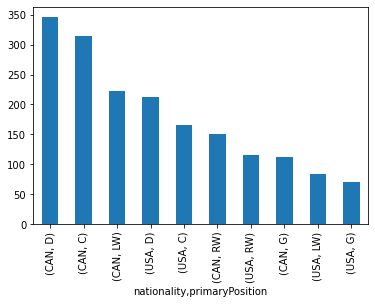

In [7]:
player_info.groupby(['nationality'])['primaryPosition'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

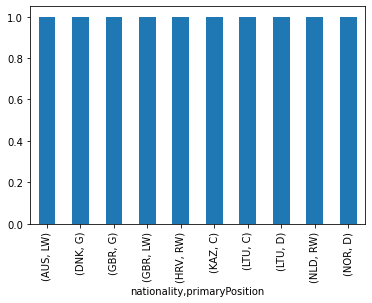

In [8]:
player_info.groupby(['nationality'])['primaryPosition'].value_counts().sort_values()[:10].plot(kind='bar')

In [9]:
table = player_info.groupby(['nationality'])['primaryPosition'].value_counts().to_frame()

In [10]:
table = table.unstack()

In [11]:
table.fillna(0, inplace=True)

In [12]:
table.rename(columns={'primaryPosition':'num_jogadores'}, inplace=True)

In [13]:
table

num_jogadores                            
primaryPosition             C      D      G     LW     RW
nationality                                              
AUS                       0.0    0.0    0.0    1.0    0.0
AUT                       0.0    0.0    0.0    2.0    2.0
BHS                       1.0    0.0    0.0    0.0    0.0
BLR                       1.0    3.0    0.0    2.0    0.0
CAN                     314.0  346.0  113.0  223.0  150.0
CHE                       4.0    9.0    3.0    2.0    6.0
CZE                      20.0   30.0   13.0   10.0   23.0
DEU                       6.0    4.0    5.0    3.0    2.0
DNK                       4.0    2.0    1.0    2.0    5.0
FIN                      21.0   25.0   20.0   19.0   15.0
FRA                       2.0    2.0    0.0    2.0    0.0
GBR                       0.0    0.0    1.0    1.0    0.0
HRV                       0.0    0.0    0.0    0.0    1.0
KAZ                       1.0    0.0    0.0    0.0    0.0
LTU                       1.0    1.0    0.0    0.0    0.0
LVA                       2.0    3.0    2.0    4.0    0.0
NGA                       0.0    0.0    0.0    0.0    1.0
NLD                       0.0    0.0    0.0    0.0    1.0
NOR                       0.0    1.0    0.0    1.0    1.0
RUS                      19.0   30.0   11.0   16.0   23.0
SVK                       5.0    9.0    2.0    4.0    5.0
SVN                       1.0    0.0    0.0    1.0    0.0
SWE                      43.0   65.0   22.0   34.0   20.0
UKR                       0.0    1.0    0.0    2.0    0.0
USA                     165.0  212.0   71.0   83.0  116.0

In [14]:
nhl_eda = pd.merge(game, game_teams_stats, on='game_id')

In [15]:
nhl_eda.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


In [16]:
game.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


In [17]:
team_dict = team_info.set_index('team_id')['teamName'].to_dict()


In [18]:
team_dict

{1: 'Devils',
 4: 'Flyers',
 26: 'Kings',
 14: 'Lightning',
 6: 'Bruins',
 3: 'Rangers',
 5: 'Penguins',
 17: 'Red Wings',
 28: 'Sharks',
 18: 'Predators',
 23: 'Canucks',
 16: 'Blackhawks',
 9: 'Senators',
 8: 'Canadiens',
 30: 'Wild',
 15: 'Capitals',
 19: 'Blues',
 24: 'Ducks',
 27: 'Coyotes',
 2: 'Islanders',
 10: 'Maple Leafs',
 13: 'Panthers',
 7: 'Sabres',
 20: 'Flames',
 21: 'Avalanche',
 25: 'Stars',
 29: 'Blue Jackets',
 52: 'Jets',
 22: 'Oilers',
 54: 'Golden Knights',
 12: 'Hurricanes',
 53: 'Coyotes',
 11: 'Thrashers'}

In [19]:
# aplicando no nosso DataFrame
nhl_eda['team_id'].replace(team_dict, inplace=True)
nhl_eda['away_team_id'].replace(team_dict, inplace=True)
nhl_eda['home_team_id'].replace(team_dict, inplace=True)

In [20]:
cols_drop = ['date_time_GMT', 'outcome', 'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
             'venue_time_zone_offset', 'venue_time_zone_tz']

In [21]:
nhl_eda = nhl_eda.drop(labels=cols_drop, axis=1)

In [22]:
nhl_eda.head(3)

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Devils,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Flyers,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Devils,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7


In [23]:
for column in ['date_time']:
    nhl_eda[column] = pd.to_datetime(nhl_eda[column], errors='coerce')

In [24]:
# criando coluna resultado
nhl_eda['outcome'] = nhl_eda['won'].map({False:'Lose', True:'Win'})

# excluindo coluna redundante
nhl_eda.drop('won', axis=1, inplace=True)

In [25]:
nhl_eda.head()

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Devils,away,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7,Lose
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Flyers,home,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4,Win
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Devils,away,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7,Win
3,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Flyers,home,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6,Lose
4,2011030223,20112012,P,2012-05-03,Flyers,Devils,3,4,Flyers,away,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1,Lose


In [26]:
# Series with number of wins
teams_wins = nhl_eda[nhl_eda['outcome']=='Win']['team_id'].value_counts()

# Series with number of defeats
team_deafeats = nhl_eda[nhl_eda['outcome']=='Lose']['team_id'].value_counts()

# concatenando Series 
teams_performance = pd.concat([teams_wins, team_deafeats], axis=1, keys=['wins','deafeats'])

# add columns with number of total games
teams_performance['total_games'] = teams_performance['wins'] + teams_performance['deafeats']

# add column with win rate
teams_performance['win_rate_%'] = round(teams_performance['wins']/teams_performance['total_games'], 4)


In [27]:
teams_performance

,wins,deafeats,total_games,win_rate_%
Penguins,478,337,815,0.5865
Bruins,465,347,812,0.5727
Capitals,461,343,804,0.5734
Lightning,449,341,790,0.5684
Blues,445,343,788,0.5647
Sharks,442,363,805,0.5491
Blackhawks,436,357,793,0.5498
Rangers,426,376,802,0.5312
Ducks,423,351,774,0.5465
Predators,418,369,787,0.5311


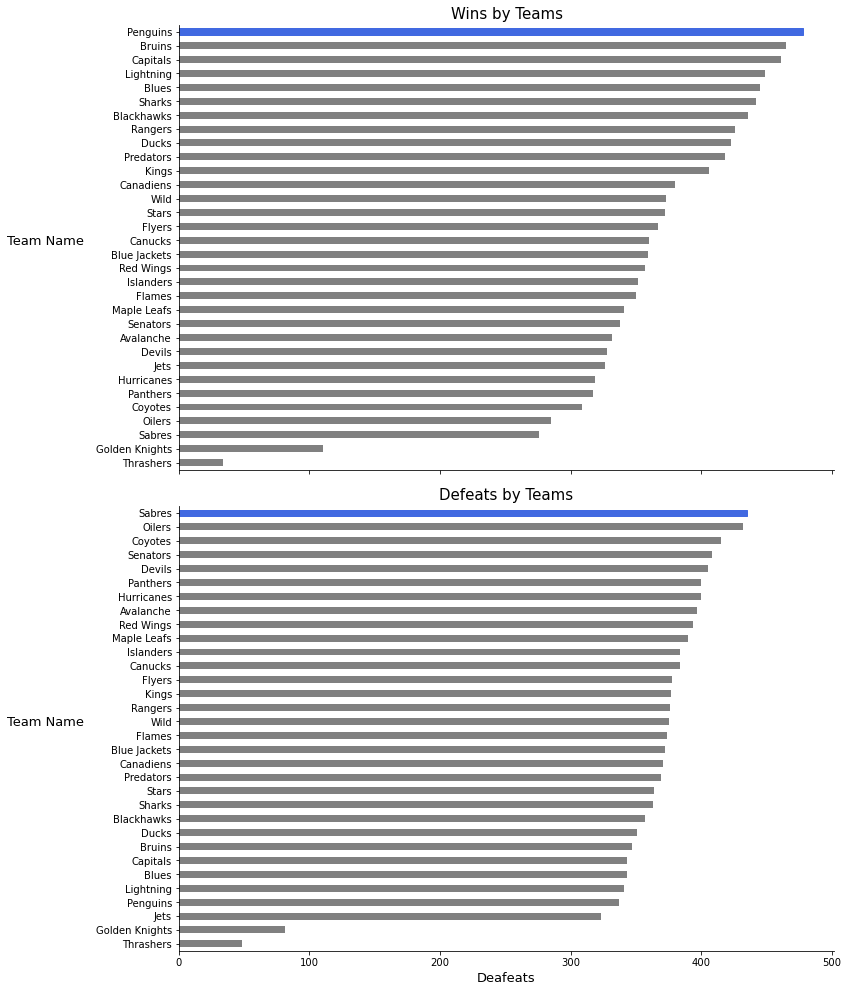

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=True, figsize=(12, 14))
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=12)

# wins
teams_performance['wins'].sort_values().plot(kind='barh', color='gray', ax=ax1)
ax1.set_title("Wins by Teams", fontsize=15)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.patches[31].set_color('royalblue')
ax1.set_xlabel('Wins', fontsize=13)
ax1.set_ylabel('Team Name', fontsize=13, rotation=0, labelpad=50)


# loses
teams_performance['deafeats'].sort_values().plot(kind='barh', color='gray', ax=ax2)
ax2.set_title("Defeats by Teams", fontsize=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.patches[31].set_color('royalblue')
ax2.set_xlabel('Deafeats', fontsize=13)
ax2.set_ylabel('Team Name', fontsize=13, rotation=0, labelpad=50)

plt.tight_layout(pad=1.5)

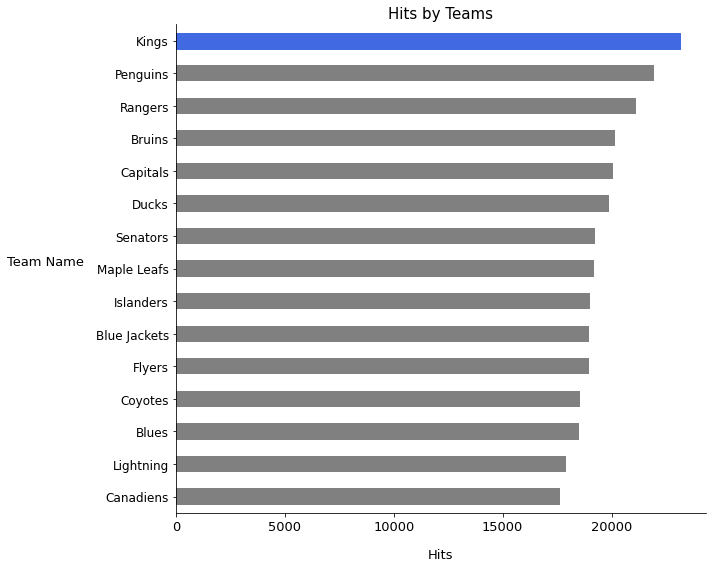

In [29]:
teams_hits = nhl_eda.groupby(['team_id'])['hits'].sum().nlargest(15)
fig, ax = plt.subplots(figsize=(10, 8))
teams_hits.sort_values().plot(kind='barh', color='gray', ax=ax)
# nomeando
ax.set_title("Hits by Teams", fontsize=15)
ax.set_ylabel("Team Name",fontsize=13, rotation= 0, labelpad=50)
ax.set_xlabel("Hits", fontsize=13, labelpad=15)


# estilizando
ax.patches[14].set_color('royalblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

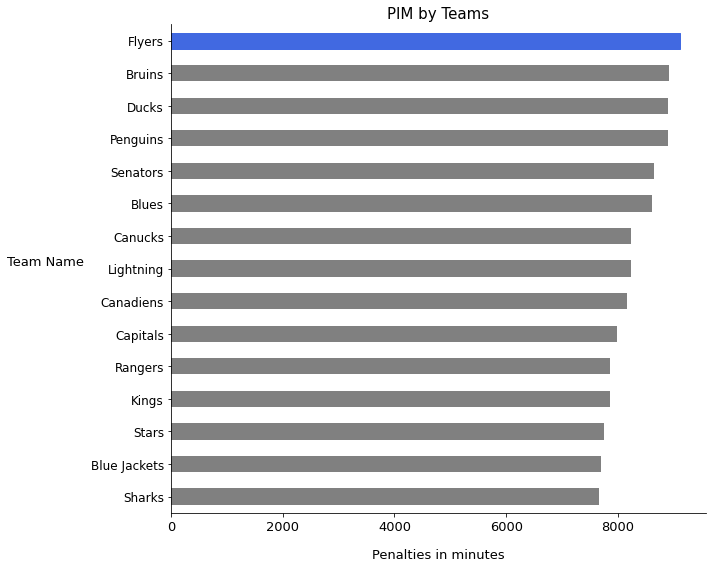

In [30]:
teams_pim = nhl_eda.groupby(['team_id'])['pim'].sum().nlargest(15)
fig, ax = plt.subplots(figsize=(10, 8))
teams_pim.sort_values().plot(kind='barh', color='gray', ax=ax)
# nomeando
ax.set_title("PIM by Teams", fontsize=15)
ax.set_ylabel("Team Name",fontsize=13, rotation= 0, labelpad=45)
ax.set_xlabel("Penalties in minutes", fontsize=13, labelpad=15)

# estilizando
ax.patches[14].set_color('royalblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

In [31]:
# goals
nhl_eda.head(3)

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Devils,away,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7,Lose
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Flyers,home,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4,Win
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Devils,away,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7,Win


In [32]:
# devils
devilsdf = nhl_eda[nhl_eda['team_id'] == 'Devils']

gols_tomados_times_mandantes = devilsdf[(devilsdf['team_id'] == "Devils") & (devilsdf['HoA'] == 'away') & 
                                        (devilsdf['away_team_id']== "Devils")]['home_goals']

gols_tomados_times_visitantes = devilsdf[(devilsdf['HoA']=='home') & (devilsdf['team_id']=='Devils') & 
                                         (devilsdf['home_team_id']=='Devils')]['away_goals']

devilsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [33]:
# Flyers
Flyersdf = nhl_eda[nhl_eda['team_id'] == 'Flyers']

gols_tomados_times_mandantes = Flyersdf[(Flyersdf['team_id'] == "Flyers") & (Flyersdf['HoA'] == 'away') & 
                                        (Flyersdf['away_team_id']== "Flyers")]['home_goals']

gols_tomados_times_visitantes = Flyersdf[(Flyersdf['HoA']=='home') & (Flyersdf['team_id']=='Flyers') & 
                                         (Flyersdf['home_team_id']=='Flyers')]['away_goals']

FlyersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [34]:
# Kings
kingsdf = nhl_eda[nhl_eda['team_id'] == 'Kings']

gols_tomados_times_mandantes = kingsdf[(kingsdf['team_id'] == 'Kings') & (kingsdf['HoA'] == 'away') & 
                                        (kingsdf['away_team_id']== 'Kings')]['home_goals']

gols_tomados_times_visitantes = kingsdf[(kingsdf['HoA']=='home') & (kingsdf['team_id']=='Kings') & 
                                         (kingsdf['home_team_id']=='Kings')]['away_goals']

kingsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [35]:
# Lightning
lightningdf = nhl_eda[nhl_eda['team_id'] == 'Lightning']

gols_tomados_times_mandantes = lightningdf[(lightningdf['team_id'] == 'Lightning') & (lightningdf['HoA'] == 'away') & 
                                        (lightningdf['away_team_id']== 'Lightning')]['home_goals']

gols_tomados_times_visitantes = lightningdf[(lightningdf['HoA']=='home') & (lightningdf['team_id']=='Lightning') & 
                                         (lightningdf['home_team_id']=='Lightning')]['away_goals']

lightningGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [36]:
# Bruins
Bruinsdf = nhl_eda[nhl_eda['team_id'] == 'Bruins']

gols_tomados_times_mandantes = Bruinsdf[(Bruinsdf['team_id'] == "Bruins") & (Bruinsdf['HoA'] == 'away') & 
                                        (Bruinsdf['away_team_id']== "Bruins")]['home_goals']

gols_tomados_times_visitantes = Bruinsdf[(Bruinsdf['HoA']=='home') & (Bruinsdf['team_id']=='Bruins') & 
                                         (Bruinsdf['home_team_id']=='Bruins')]['away_goals']

BruinsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [37]:
# Rangers
Rangersdf = nhl_eda[nhl_eda['team_id'] == 'Rangers']

gols_tomados_times_mandantes = Rangersdf[(Rangersdf['team_id'] == "Rangers") & (Rangersdf['HoA'] == 'away') & 
                                        (Rangersdf['away_team_id']== "Rangers")]['home_goals']

gols_tomados_times_visitantes = Rangersdf[(Rangersdf['HoA']=='home') & (Rangersdf['team_id']=='Rangers') & 
                                         (Rangersdf['home_team_id']=='Rangers')]['away_goals']

RangersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [38]:
# Penguins
Penguinsdf = nhl_eda[nhl_eda['team_id'] == 'Penguins']

gols_tomados_times_mandantes = Penguinsdf[(Penguinsdf['team_id'] == "Penguins") & (Penguinsdf['HoA'] == 'away') & 
                                        (Penguinsdf['away_team_id']== "Penguins")]['home_goals']

gols_tomados_times_visitantes = Penguinsdf[(Penguinsdf['HoA']=='home') & (Penguinsdf['team_id']=='Penguins') & 
                                         (Penguinsdf['home_team_id']=='Penguins')]['away_goals']

PenguinsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [39]:
# Red Wings
RedWingsdf = nhl_eda[nhl_eda['team_id'] == 'Red Wings']

gols_tomados_times_mandantes = RedWingsdf[(RedWingsdf['team_id'] == "Red Wings") & (RedWingsdf['HoA'] == 'away') & 
                                        (RedWingsdf['away_team_id']== "Red Wings")]['home_goals']

gols_tomados_times_visitantes = RedWingsdf[(RedWingsdf['HoA']=='home') & (RedWingsdf['team_id']=='Red Wings') & 
                                         (RedWingsdf['home_team_id']=='Red Wings')]['away_goals']

RedWingsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [40]:
# Sharks
Sharksdf = nhl_eda[nhl_eda['team_id'] == 'Sharks']

gols_tomados_times_mandantes = Sharksdf[(Sharksdf['team_id'] == "Sharks") & (Sharksdf['HoA'] == 'away') & 
                                        (Sharksdf['away_team_id']== "Sharks")]['home_goals']

gols_tomados_times_visitantes = Sharksdf[(Sharksdf['HoA']=='home') & (Sharksdf['team_id']=='Sharks') & 
                                         (Sharksdf['home_team_id']=='Sharks')]['away_goals']

SharksGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [41]:
# Predators
Predatorsdf = nhl_eda[nhl_eda['team_id'] == 'Predators']

gols_tomados_times_mandantes = Predatorsdf[(Predatorsdf['team_id'] == "Predators") & (Predatorsdf['HoA'] == 'away') & 
                                        (Predatorsdf['away_team_id']== "Predators")]['home_goals']

gols_tomados_times_visitantes = Predatorsdf[(Predatorsdf['HoA']=='home') & (Predatorsdf['team_id']=='Predators') & 
                                         (Predatorsdf['home_team_id']=='Predators')]['away_goals']

PredatorsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [42]:
# Canucks
Canucksdf = nhl_eda[nhl_eda['team_id'] == 'Canucks']

gols_tomados_times_mandantes = Canucksdf[(Canucksdf['team_id'] == "Canucks") & (Canucksdf['HoA'] == 'away') & 
                                        (Canucksdf['away_team_id']== "Canucks")]['home_goals']

gols_tomados_times_visitantes = Canucksdf[(Canucksdf['HoA']=='home') & (Canucksdf['team_id']=='Canucks') & 
                                         (Canucksdf['home_team_id']=='Canucks')]['away_goals']

CanucksGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [43]:
# Blackhawks
Blackhawksdf = nhl_eda[nhl_eda['team_id'] == 'Blackhawks']

gols_tomados_times_mandantes = Blackhawksdf[(Blackhawksdf['team_id'] == "Blackhawks") & (Blackhawksdf['HoA'] == 'away') & 
                                        (Blackhawksdf['away_team_id']== "Blackhawks")]['home_goals']

gols_tomados_times_visitantes = Blackhawksdf[(Blackhawksdf['HoA']=='home') & (Blackhawksdf['team_id']=='Blackhawks') & 
                                         (Blackhawksdf['home_team_id']=='Blackhawks')]['away_goals']

BlackhawksGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [44]:
# 'Senators', 
Senatorsdf = nhl_eda[nhl_eda['team_id'] == 'Senators']

gols_tomados_times_mandantes = Senatorsdf[(Senatorsdf['team_id'] == "Senators") & (Senatorsdf['HoA'] == 'away') & 
                                        (Senatorsdf['away_team_id']== "Senators")]['home_goals']

gols_tomados_times_visitantes = Senatorsdf[(Senatorsdf['HoA']=='home') & (Senatorsdf['team_id']=='Senators') & 
                                         (Senatorsdf['home_team_id']=='Senators')]['away_goals']

SenatorsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [45]:
# 'Canadiens', 
Canadiensdf = nhl_eda[nhl_eda['team_id'] == 'Canadiens']

gols_tomados_times_mandantes = Canadiensdf[(Canadiensdf['team_id'] == "Canadiens") & (Canadiensdf['HoA'] == 'away') & 
                                        (Canadiensdf['away_team_id']== "Canadiens")]['home_goals']

gols_tomados_times_visitantes = Canadiensdf[(Canadiensdf['HoA']=='home') & (Canadiensdf['team_id']=='Canadiens') & 
                                         (Canadiensdf['home_team_id']=='Canadiens')]['away_goals']

CanadiensGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [46]:
# 'Wild', 
Wilddf = nhl_eda[nhl_eda['team_id'] == 'Wild']

gols_tomados_times_mandantes = Wilddf[(Wilddf['team_id'] == "Wild") & (Wilddf['HoA'] == 'away') & 
                                        (Wilddf['away_team_id']== "Wild")]['home_goals']

gols_tomados_times_visitantes = Wilddf[(Wilddf['HoA']=='home') & (Wilddf['team_id']=='Wild') & 
                                         (Wilddf['home_team_id']=='Wild')]['away_goals']

WildGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [47]:
# 'Capitals', 
Capitalsdf = nhl_eda[nhl_eda['team_id'] == 'Capitals']

gols_tomados_times_mandantes = Capitalsdf[(Capitalsdf['team_id'] == "Capitals") & (Capitalsdf['HoA'] == 'away') & 
                                        (Capitalsdf['away_team_id']== "Capitals")]['home_goals']

gols_tomados_times_visitantes = Capitalsdf[(Capitalsdf['HoA']=='home') & (Capitalsdf['team_id']=='Capitals') & 
                                         (Capitalsdf['home_team_id']=='Capitals')]['away_goals']

CapitalsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [48]:
# 'Blues',
Bluesdf = nhl_eda[nhl_eda['team_id'] == 'Blues']

gols_tomados_times_mandantes = Bluesdf[(Bluesdf['team_id'] == "Blues") & (Bluesdf['HoA'] == 'away') & 
                                        (Bluesdf['away_team_id']== "Blues")]['home_goals']

gols_tomados_times_visitantes = Bluesdf[(Bluesdf['HoA']=='home') & (Bluesdf['team_id']=='Blues') & 
                                         (Bluesdf['home_team_id']=='Blues')]['away_goals']

BluesGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [49]:
# 'Ducks',
Ducksdf = nhl_eda[nhl_eda['team_id'] == 'Ducks']

gols_tomados_times_mandantes = Ducksdf[(Ducksdf['team_id'] == "Ducks") & (Ducksdf['HoA'] == 'away') & 
                                        (Ducksdf['away_team_id']== "Ducks")]['home_goals']

gols_tomados_times_visitantes = Ducksdf[(Ducksdf['HoA']=='home') & (Ducksdf['team_id']=='Ducks') & 
                                         (Ducksdf['home_team_id']=='Ducks')]['away_goals']

DucksGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [50]:
#  'Coyotes', 
Coyotesdf = nhl_eda[nhl_eda['team_id'] == 'Coyotes']

gols_tomados_times_mandantes = Coyotesdf[(Coyotesdf['team_id'] == "Coyotes") & (Coyotesdf['HoA'] == 'away') & 
                                        (Coyotesdf['away_team_id']== "Coyotes")]['home_goals']

gols_tomados_times_visitantes = Coyotesdf[(Coyotesdf['HoA']=='home') & (Coyotesdf['team_id']=='Coyotes') & 
                                         (Coyotesdf['home_team_id']=='Coyotes')]['away_goals']

CoyotesGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [51]:
# 'Islanders', 
Islandersdf = nhl_eda[nhl_eda['team_id'] == 'Islanders']

gols_tomados_times_mandantes = Islandersdf[(Islandersdf['team_id'] == "Islanders") & (Islandersdf['HoA'] == 'away') & 
                                        (Islandersdf['away_team_id']== "Islanders")]['home_goals']

gols_tomados_times_visitantes = Islandersdf[(Islandersdf['HoA']=='home') & (Islandersdf['team_id']=='Islanders') & 
                                         (Islandersdf['home_team_id']=='Islanders')]['away_goals']

IslandersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [52]:
# 'Maple Leafs', 
MapleLeafsdf = nhl_eda[nhl_eda['team_id'] == 'Maple Leafs']

gols_tomados_times_mandantes = MapleLeafsdf[(MapleLeafsdf['team_id'] == "Maple Leafs") & (MapleLeafsdf['HoA'] == 'away') & 
                                        (MapleLeafsdf['away_team_id']== "Maple Leafs")]['home_goals']

gols_tomados_times_visitantes = MapleLeafsdf[(MapleLeafsdf['HoA']=='home') & (MapleLeafsdf['team_id']=='Maple Leafs') & 
                                         (MapleLeafsdf['home_team_id']=='Maple Leafs')]['away_goals']

MapleLeafsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [53]:
# 'Panthers'
Panthersdf = nhl_eda[nhl_eda['team_id'] == 'Panthers']

gols_tomados_times_mandantes = Panthersdf[(Panthersdf['team_id'] == "Panthers") & (Panthersdf['HoA'] == 'away') & 
                                        (Panthersdf['away_team_id']== "Panthers")]['home_goals']

gols_tomados_times_visitantes = Panthersdf[(Panthersdf['HoA']=='home') & (Panthersdf['team_id']=='Panthers') & 
                                         (Panthersdf['home_team_id']=='Panthers')]['away_goals']

PanthersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [54]:
# 'Sabres', 
Sabresdf = nhl_eda[nhl_eda['team_id'] == 'Sabres']

gols_tomados_times_mandantes = Sabresdf[(Sabresdf['team_id'] == "Sabres") & (Sabresdf['HoA'] == 'away') & 
                                        (Sabresdf['away_team_id']== "Sabres")]['home_goals']

gols_tomados_times_visitantes = Sabresdf[(Sabresdf['HoA']=='home') & (Sabresdf['team_id']=='Sabres') & 
                                         (Sabresdf['home_team_id']=='Sabres')]['away_goals']

SabresGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [55]:
# 'Flames', 
Flamesdf = nhl_eda[nhl_eda['team_id'] == 'Flames']

gols_tomados_times_mandantes = Flamesdf[(Flamesdf['team_id'] == "Flames") & (Flamesdf['HoA'] == 'away') & 
                                        (Flamesdf['away_team_id']== "Flames")]['home_goals']

gols_tomados_times_visitantes = Flamesdf[(Flamesdf['HoA']=='home') & (Flamesdf['team_id']=='Flames') & 
                                         (Flamesdf['home_team_id']=='Flames')]['away_goals']

FlamesGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [56]:
# 'Avalanche', '
Avalanchedf = nhl_eda[nhl_eda['team_id'] == 'Avalanche']

gols_tomados_times_mandantes = Avalanchedf[(Avalanchedf['team_id'] == "Avalanche") & (Avalanchedf['HoA'] == 'away') & 
                                        (Avalanchedf['away_team_id']== "Avalanche")]['home_goals']

gols_tomados_times_visitantes = Avalanchedf[(Avalanchedf['HoA']=='home') & (Avalanchedf['team_id']=='Avalanche') & 
                                         (Avalanchedf['home_team_id']=='Avalanche')]['away_goals']

AvalancheGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [57]:
# Stars', 
Starsdf = nhl_eda[nhl_eda['team_id'] == 'Stars']

gols_tomados_times_mandantes = Starsdf[(Starsdf['team_id'] == "Stars") & (Starsdf['HoA'] == 'away') & 
                                        (Starsdf['away_team_id']== "Stars")]['home_goals']

gols_tomados_times_visitantes = Starsdf[(Starsdf['HoA']=='home') & (Starsdf['team_id']=='Stars') & 
                                         (Starsdf['home_team_id']=='Stars')]['away_goals']

StarsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [58]:
# 'Blue Jackets',
BlueJacketsdf = nhl_eda[nhl_eda['team_id'] == 'Blue Jackets']

gols_tomados_times_mandantes = BlueJacketsdf[(BlueJacketsdf['team_id'] == "Blue Jackets") & (BlueJacketsdf['HoA'] == 'away') & 
                                        (BlueJacketsdf['away_team_id']== "Blue Jackets")]['home_goals']

gols_tomados_times_visitantes = BlueJacketsdf[(BlueJacketsdf['HoA']=='home') & (BlueJacketsdf['team_id']=='Blue Jackets') & 
                                         (BlueJacketsdf['home_team_id']=='Blue Jackets')]['away_goals']

BlueJacketsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [59]:
#  'Jets',
Jetsdf = nhl_eda[nhl_eda['team_id'] == 'Jets']

gols_tomados_times_mandantes = Jetsdf[(Jetsdf['team_id'] == "Jets") & (Jetsdf['HoA'] == 'away') & 
                                        (Jetsdf['away_team_id']== "Jets")]['home_goals']

gols_tomados_times_visitantes = Jetsdf[(Jetsdf['HoA']=='home') & (Jetsdf['team_id']=='Jets') & 
                                         (Jetsdf['home_team_id']=='Jets')]['away_goals']

JetsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [60]:
# 'Oilers', 
Oilersdf = nhl_eda[nhl_eda['team_id'] == 'Oilers']

gols_tomados_times_mandantes = Oilersdf[(Oilersdf['team_id'] == "Oilers") & (Oilersdf['HoA'] == 'away') & 
                                        (Oilersdf['away_team_id']== "Oilers")]['home_goals']

gols_tomados_times_visitantes = Oilersdf[(Oilersdf['HoA']=='home') & (Oilersdf['team_id']=='Oilers') & 
                                         (Oilersdf['home_team_id']=='Oilers')]['away_goals']

OilersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [61]:
# 'Golden Knights', 
GoldenKnightsdf = nhl_eda[nhl_eda['team_id'] == 'Golden Knights']

gols_tomados_times_mandantes = GoldenKnightsdf[(GoldenKnightsdf['team_id'] == "Golden Knights") & (GoldenKnightsdf['HoA'] == 'away') & 
                                        (GoldenKnightsdf['away_team_id']== "Golden Knights")]['home_goals']

gols_tomados_times_visitantes = GoldenKnightsdf[(GoldenKnightsdf['HoA']=='home') & (GoldenKnightsdf['team_id']=='Golden Knights') & 
                                         (GoldenKnightsdf['home_team_id']=='Golden Knights')]['away_goals']

GoldenKnightsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [62]:
# 'Hurricanes', 
Hurricanesdf = nhl_eda[nhl_eda['team_id'] == 'Hurricanes']

gols_tomados_times_mandantes = Hurricanesdf[(Hurricanesdf['team_id'] == "Hurricanes") & (Hurricanesdf['HoA'] == 'away') & 
                                        (Hurricanesdf['away_team_id']== "Hurricanes")]['home_goals']

gols_tomados_times_visitantes = Hurricanesdf[(Hurricanesdf['HoA']=='home') & (Hurricanesdf['team_id']=='Hurricanes') & 
                                         (Hurricanesdf['home_team_id']=='Hurricanes')]['away_goals']

HurricanesGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


In [63]:
# 'Thrashers'
Thrashersdf = nhl_eda[nhl_eda['team_id'] == 'Thrashers']

gols_tomados_times_mandantes = Thrashersdf[(Thrashersdf['team_id'] == "Thrashers") & (Thrashersdf['HoA'] == 'away') & 
                                        (Thrashersdf['away_team_id']== "Thrashers")]['home_goals']

gols_tomados_times_visitantes = Thrashersdf[(Thrashersdf['HoA']=='home') & (Thrashersdf['team_id']=='Thrashers') & 
                                         (Thrashersdf['home_team_id']=='Thrashers')]['away_goals']

ThrashersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')




In [64]:
#lista_concat = [devilsGA, FlyersGA, kingsGA, lightningGA,
#                BruinsGA, RangersGA, PenguinsGA, RedWingsGA,
#                SharksGA, PredatorsGA, CanucksGA, BlackhawksGA,
#                SenatorsGA, CanadiensGA, WildGA, CapitalsGA,
#                BluesGA, DucksGA, CoyotesGA, IslandersGA, MapleLeafsGA,
#                PanthersGA, SabresGA, FlamesGA, AvalancheGA, StarsGA,
#                BlueJacketsGA, JetsGA, OilersGA, GoldenKnightsGA,
#                HurricanesGA, ThrashersGA
#               ]

In [65]:
#GA_total = pd.concat(lista_concat)

In [66]:
#nhl_eda = pd.merge(nhl_eda, GA_total, left_index=True, right_index=True)

In [67]:
#team_list = list(nhl_eda['team_id'].unique())

In [68]:
team_list = nhl_eda['team_id'].unique()

series = dict()
for name in team_list:
    

    testedf = nhl_eda[nhl_eda['team_id'] == name ]

    gols_tomados_times_mandantes = testedf[(testedf['team_id'] == name ) & (testedf['HoA'] == 'away') & 
                                            (testedf['away_team_id']== name )]['home_goals']
    

    gols_tomados_times_visitantes = testedf[(testedf['HoA']=='home') & (testedf['team_id']== name) & 
                                            (testedf['home_team_id']== name)]['away_goals']
    
    testeGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')
    
    series[name] = testeGA


    
list_teste = list()
for values in series.values():
    list_teste.append(values)

In [69]:
GA_teste = pd.concat(list_teste)

In [70]:
GA_teste

,GA
0,4
2,1
8,1
14,4
16,1
...,...
21823,1
21839,3
22005,0
22009,5


In [71]:
nhl_eda = pd.concat([nhl_eda, GA_teste], axis=1)

In [72]:
nhl_eda.drop(['away_team_id','home_team_id','away_goals', 'home_goals'], axis=1, inplace=True)

Nos Gols Tomados estao incluidos as derrotas no shoot-out, mas apenas o numero de derrotas e nao o numero de gols tomados.

In [73]:
nhl_eda.shape

(22868, 19)

In [74]:
nhl_eda = nhl_eda[['game_id', 'season', 'type', 'date_time', 'team_id','goals', 'GA',
                   'HoA','settled_in','outcome', 'head_coach', 'shots', 'hits', 'pim',
                   'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage','giveaways',
                   'takeaways']].rename(columns={'team_id':'team_name',
                                                 'goals':'GF'})

In [75]:
nhl_eda

,game_id,season,type,date_time,team_name,GF,GA,HoA,settled_in,outcome,head_coach,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,Devils,3,4,away,OT,Lose,Peter DeBoer,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,Flyers,4,3,home,OT,Win,Peter Laviolette,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,Devils,4,1,away,REG,Win,Peter DeBoer,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,Flyers,1,4,home,REG,Lose,Peter Laviolette,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,Flyers,3,4,away,OT,Lose,Peter Laviolette,28,28,4,5,1,50.8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22863,2018030415,20182019,P,2019-06-07,Bruins,1,2,home,REG,Lose,Bruce Cassidy,39,43,2,3,0,40.6,4,11
22864,2018030416,20182019,P,2019-06-10,Bruins,5,1,away,REG,Win,Bruce Cassidy,32,27,10,4,1,41.3,4,10
22865,2018030416,20182019,P,2019-06-10,Blues,1,5,home,REG,Lose,Craig Berube,29,29,20,4,0,58.7,12,11
22866,2018030417,20182019,P,2019-06-13,Blues,4,1,away,REG,Win,Craig Berube,20,36,2,0,0,49.0,7,8


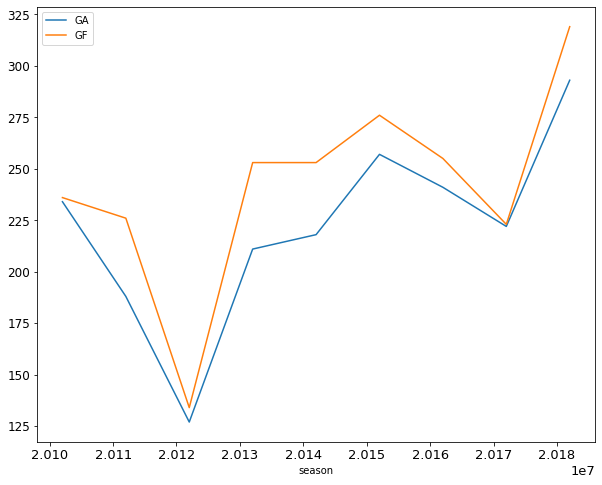

In [89]:
fig, ax = plt.subplots(figsize=(10, 8))
nhl_eda[(nhl_eda['team_name']=='Blues')].groupby(['season'])[['GA','GF']].sum().plot(ax=ax)